## t-Test and ANOVA

The goal of this exercise is to perform a t-Test and an ANalysis Of VAriance (ANOVA). We will use dataset 3, analysing the exercise variable with respect to (hypothetical) patients from different planets.

In [1]:
library(tidyverse, quietly = TRUE)
library(testthat, quietly = TRUE)

Warning message:
“replacing previous import ‘ellipsis::check_dots_unnamed’ by ‘rlang::check_dots_unnamed’ when loading ‘tibble’”
Warning message:
“replacing previous import ‘ellipsis::check_dots_used’ by ‘rlang::check_dots_used’ when loading ‘tibble’”
Warning message:
“replacing previous import ‘ellipsis::check_dots_empty’ by ‘rlang::check_dots_empty’ when loading ‘tibble’”
Registered S3 methods overwritten by 'tibble':
  method     from  
  format.tbl pillar
  print.tbl  pillar

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.0 ──

✔ ggplot2 3.3.0      ✔ purrr   0.3.4 
✔ tibble  3.0.1      ✔ dplyr   1.0.10
✔ tidyr   1.2.1      ✔ stringr 1.4.0 
✔ readr   1.3.1      ✔ forcats 0.5.0 

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()


Attaching package: ‘testthat’


The following object is masked from ‘package:dplyr’:

    matches


The following object

In [2]:
# We start with loading dataset 3 ("./data/DATA_SET_REFERENCE_3.csv") and performing QC
ds3 <- read.csv("./data/DATA_SET_REFERENCE_3.csv", row.names = 1, stringsAsFactors = TRUE)

glimpse(ds3)
# NO NAs...

Rows: 1,500
Columns: 5
$ LDL_levels        <dbl> 117.08435, 106.29582, 122.06458, 126.17185, 132.8829…
$ Planet            <fct> Earth, Earth, Earth, Earth, Earth, Earth, Earth, Ear…
$ Planet2           <fct> Earth, Earth, Earth, Earth, Earth, Earth, Earth, Ear…
$ Exercise          <dbl> 35.225465, 86.118299, 75.440539, 39.336172, 23.61452…
$ Sugar_Consumption <dbl> 33.07423, 35.76640, 30.14053, 30.96687, 39.04388, 28…


In [3]:
# Compare variable "Exercise" between Planets (variable "Planet"), first by descriptive statistics 
# mean and standard deviation
ds3 %>%
    group_by(Planet) %>%
    summarise(
    count_planet = n(),
    mean_Exercise = mean(Exercise, na.rm = TRUE),
    sd_Exercise = sd(Exercise, na.rm = TRUE)
    )


Planet,count_planet,mean_Exercise,sd_Exercise
<fct>,<int>,<dbl>,<dbl>
Earth,781,53.62124,32.10946
Venus,719,70.35124,32.29589


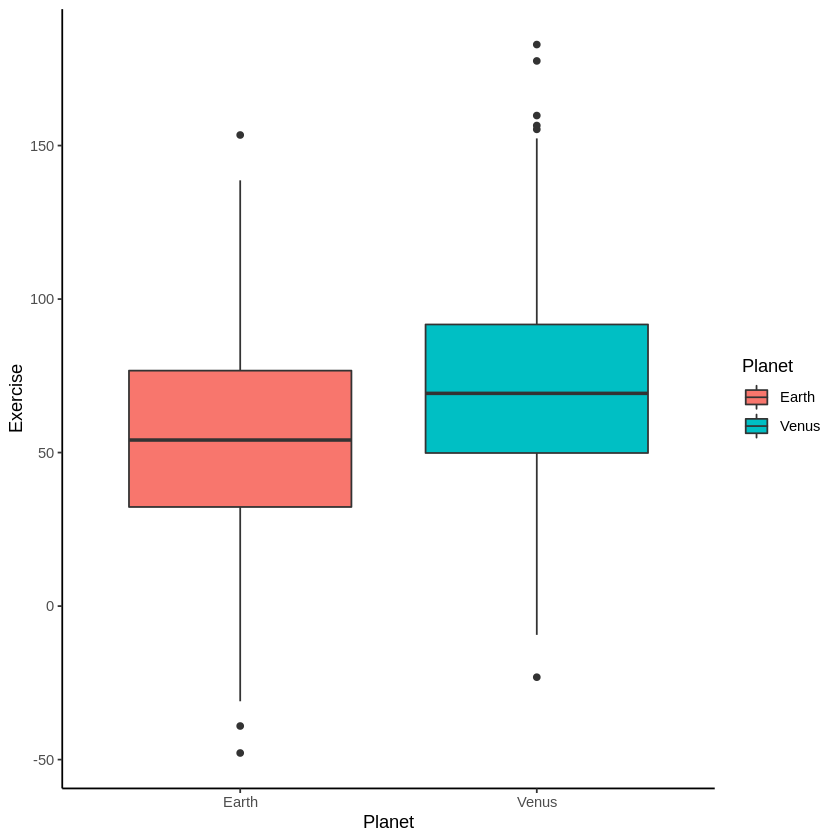

In [4]:
# Now generate a boxplot showing the distribution of the variable "Exercise" between Planets (variable "Planet")
plt <- ggplot(ds3, aes(x = Planet, y = Exercise, fill = Planet)) +
geom_boxplot() +
theme_classic()
plt

### Analyze assumptions of t-Test

Now we have to assess whether the fundamental assumptions of the t-Test hold. 

#### 1. Our data have to follow a normal distribution. 

First, we will visualize the empirical distribution of the "Exercise" variable with a histogram.

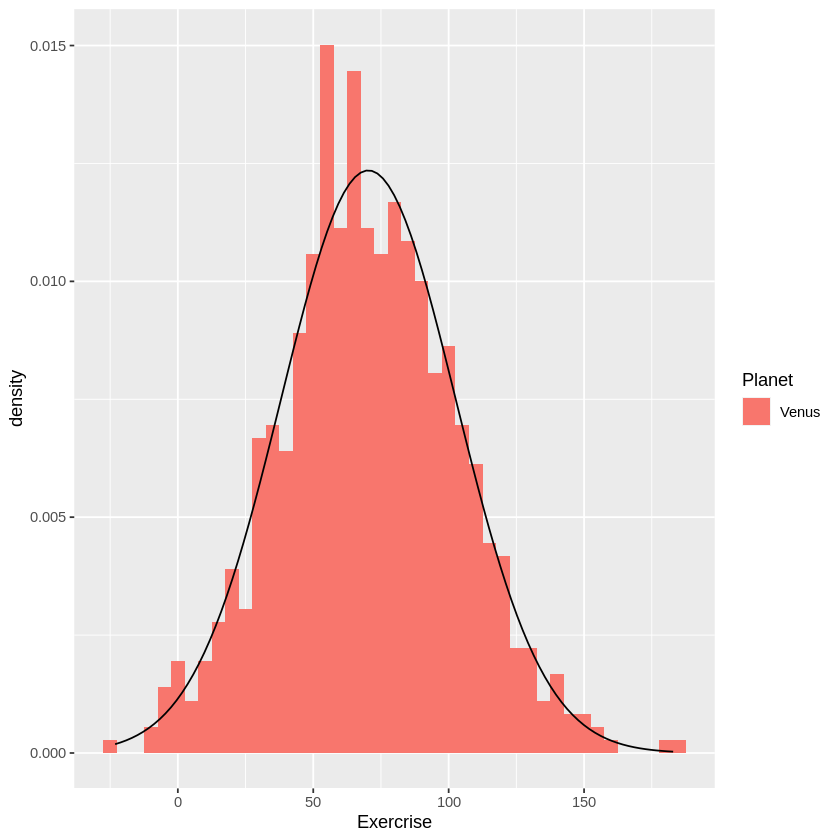

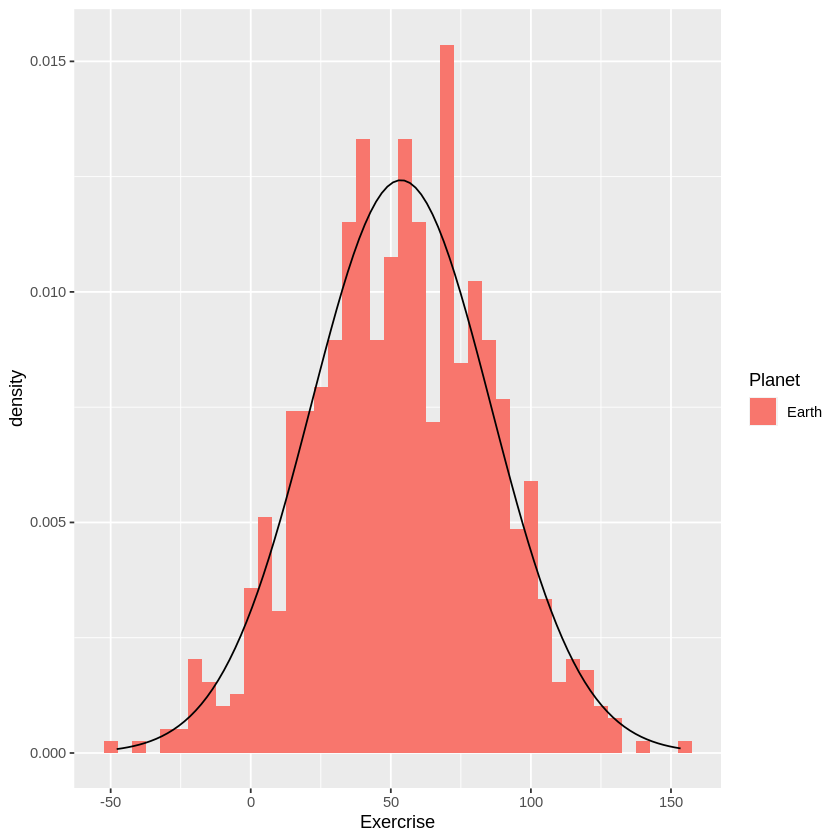

In [5]:
# Since we hypothesize that there is a difference between the planets, we have to distinguish them
planet <- 'Venus'

# ggplot2 allows to easily fit a normal distribution on our data for a visual assessment
plt <- ds3 %>% 
filter(Planet == planet) %>% 
    ggplot() + 
    geom_histogram(aes(x = Exercise, y = ..density.., fill = Planet), binwidth = 5) +
    xlab("Exercrise") +
    stat_function(fun = dnorm, 
                  args = list(mean = mean(ds3$Exercise[ds3$Planet == planet]), 
                              sd = sd(ds3$Exercise[ds3$Planet == planet])))
plt

planet <- 'Earth'
plt <- ds3 %>% 
filter(Planet == planet) %>% 
    ggplot() + 
    geom_histogram(aes(x = Exercise, y = ..density.., fill = Planet), binwidth = 5) +
    xlab("Exercrise") +
    stat_function(fun = dnorm, 
                  args = list(mean = mean(ds3$Exercise[ds3$Planet == planet]), 
                              sd = sd(ds3$Exercise[ds3$Planet == planet])))
plt

Let's also check the quantile-quantile plots.

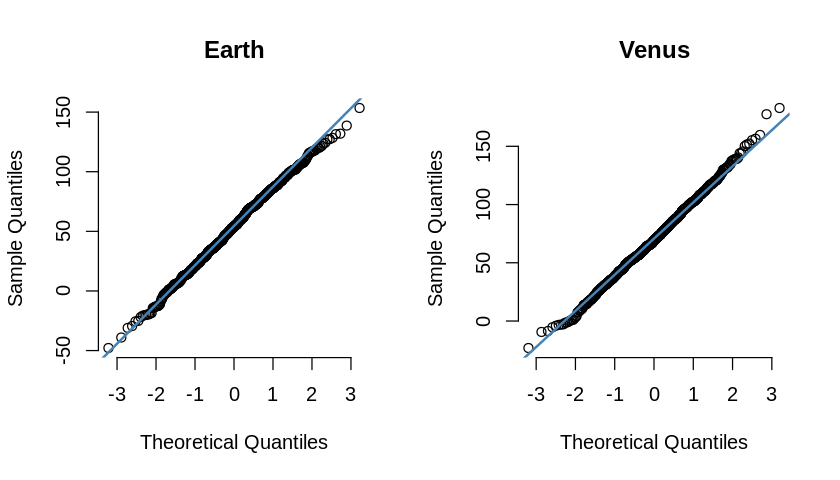

In [6]:
options(repr.plot.width = 7, repr.plot.height = 4)
par(mfrow = c(1,2), bg = 'white')
# For Earth
qqnorm(ds3$Exercise[ds3$Planet == 'Earth'], pch = 1, frame = FALSE, main = 'Earth')
qqline(ds3$Exercise[ds3$Planet == 'Earth'], col = "steelblue", lwd = 2)

# For Venus
qqnorm(ds3$Exercise[ds3$Planet == 'Venus'], pch = 1, frame = FALSE, main = 'Venus')
qqline(ds3$Exercise[ds3$Planet == 'Venus'], col = "steelblue", lwd = 2)

#### 2. Is the variance between samples same? 

The Bartlett test can be used to determine if the variance is similar between two samples.


In [11]:
# Perform a Bartlett test on the variable "Exercise" wrt. to the variable "Planet", and return the p-value

ex_vs_planet.varTest.p <- bartlett.test(Exercise ~ Planet, ds3)$p.value

# your code here


print(ex_vs_planet.varTest.p)

[1] 0.8742445


#### 3. Independence

Again, the assumption of independence can be made since our individuals originate from different planets.

***Now we can run our first t-Test.***

In [12]:
# Perform t-Test without assuming equal variance and store the p-value

ex.vs.planet.ttest.pval <- t.test(Exercise ~ Planet, ds3, var.equal=FALSE)$p.value

# your code here


print(ex.vs.planet.ttest.pval)

[1] 4.872272e-23


In [13]:
# Now perform a t-test assuming equal variance between both planets, again storing the p-Value

 ex.vs.planet.ttest.2.pval <- t.test(Exercise ~ Planet, ds3, var.equal=TRUE)$p.value

# your code here


print(ex.vs.planet.ttest.2.pval)

[1] 4.702939e-23


# ANOVA

Let's move on to a situation where patients originiate from three different planets, i.e. forming three separate groups, as provided in variable "Planet2". We will again analyse the Exercise levels, using ANOVA.

In [14]:
# First look at the means of variable "Exercise" per planet (variable "Planet2").

ds3 %>%
group_by(Planet2) %>%
summarise(
    count_planets = n(),
    mean_time = mean(Exercise, na.rm = TRUE),
    sd_time = sd(Exercise, na.rm = TRUE)
)

Planet2,count_planets,mean_time,sd_time
<fct>,<int>,<dbl>,<dbl>
Earth,781,53.62124,32.10946
Venus,364,67.80563,31.60532
Venus_moon,355,72.96138,32.82874


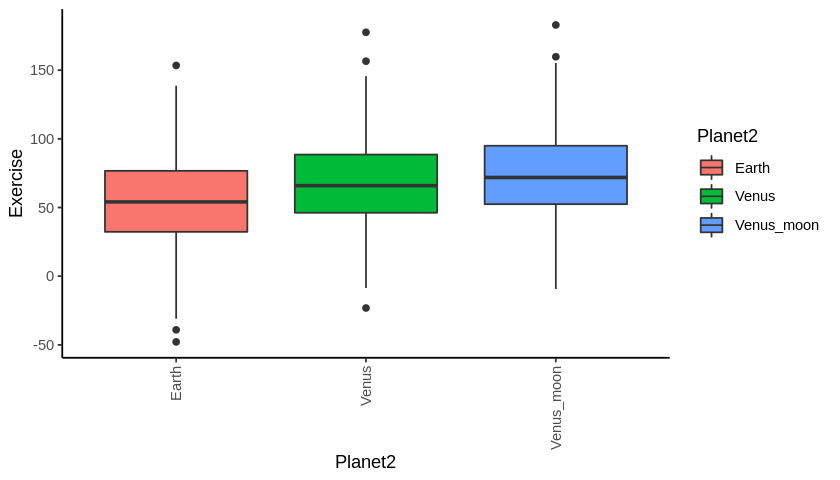

In [15]:
# And generate the boxplots to get an intuition 
plt <- ggplot(ds3, aes(x = Planet2, y = Exercise, fill = Planet2)) +
geom_boxplot() +
theme_classic() +
theme(axis.text.x = element_text(angle = 90, vjust = 0.5, hjust=1))
plt

In [17]:
# Now perform an ANOVA for the variables Exercise and Planet2 and inspect the result

 anova_one_way <- aov(Exercise ~ Planet2, ds3)
 summary(anova_one_way)

# your code here


summary(anova_one_way)

              Df  Sum Sq Mean Sq F value Pr(>F)    
Planet2        2  109558   54779   52.96 <2e-16 ***
Residuals   1497 1548308    1034                   
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

              Df  Sum Sq Mean Sq F value Pr(>F)    
Planet2        2  109558   54779   52.96 <2e-16 ***
Residuals   1497 1548308    1034                   
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

  Tukey multiple comparisons of means
    95% family-wise confidence level
    factor levels have been ordered

Fit: aov(formula = Exercise ~ Planet2, data = ds3)

$Planet2
                     diff        lwr      upr     p adj
Venus-Earth      14.18439  9.3961091 18.97267 0.0000000
Venus_moon-Earth 19.34014 14.5106358 24.16964 0.0000000
Venus_moon-Venus  5.15575 -0.4722292 10.78373 0.0805397



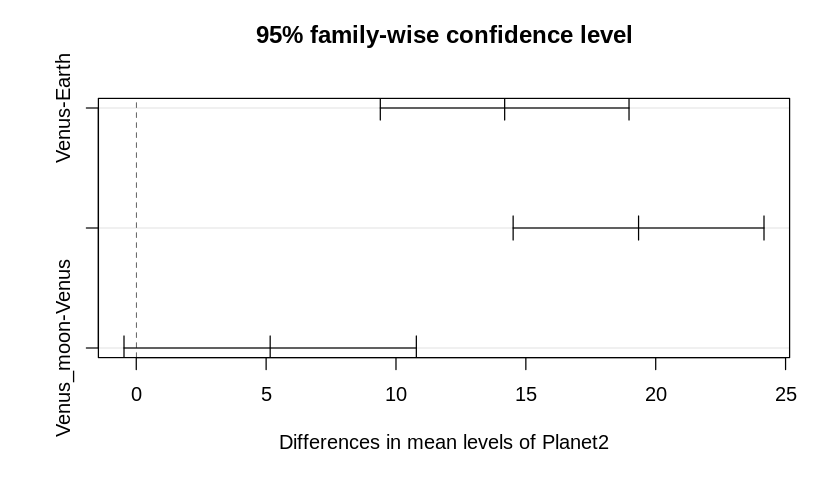

In [20]:
# Calculate and plot Tukey's Honest Significant Differences for our ANOVA of Exercise and Planet2

 ex.vs.planet.hsd <- TukeyHSD(anova_one_way, ordered = TRUE)
 plot(ex.vs.planet.hsd)

# your code here


print(ex.vs.planet.hsd)